In [1]:
import nltk
import pandas as pd

nltk.download('stopwords')
df = pd.read_csv("../Data/Tweets.csv")
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [3]:
import matplotlib.pyplot as plt

df['airline'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10, 10))
plt.show()

<Figure size 1000x1000 with 1 Axes>

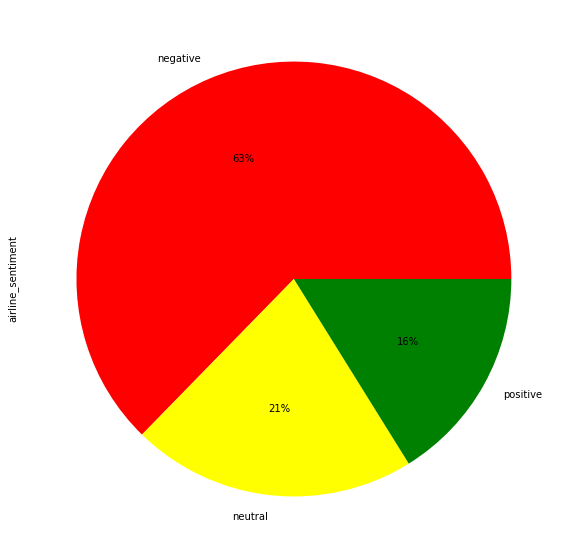

In [4]:
df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"], 
                                            figsize=(10, 10))
plt.show()

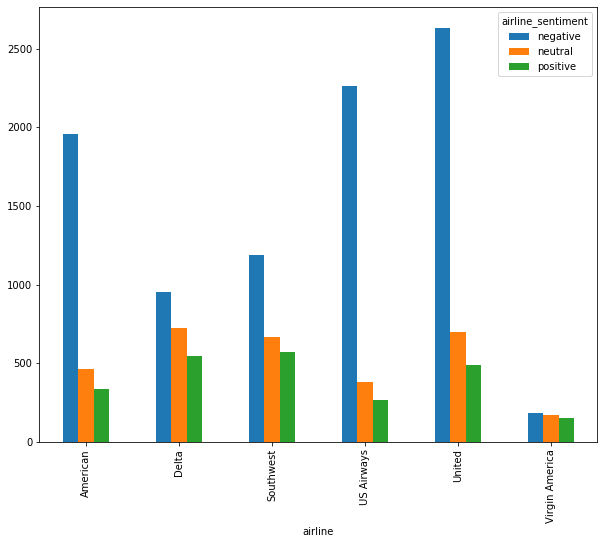

In [5]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
airline_sentiment.plot(kind='bar', figsize=(10, 8))
plt.show()

[]

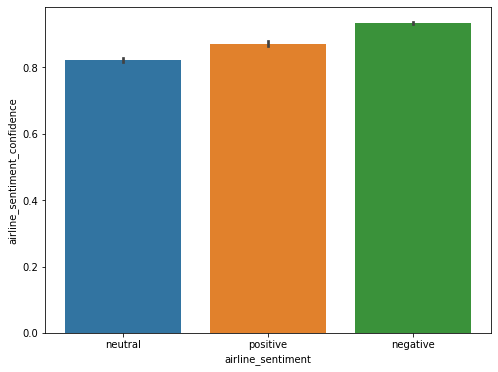

In [6]:
import seaborn as sns

plt.subplots(figsize=(8, 6))
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=df)
plt.plot()

In [7]:
df.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


In [8]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values

In [9]:
import re

processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [10]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
res = random_forest.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, res))
print(classification_report(y_test, res))

[[1691  138   41]
 [ 281  288   45]
 [ 117   75  252]]
              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1870
     neutral       0.57      0.47      0.52       614
    positive       0.75      0.57      0.64       444

    accuracy                           0.76      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



In [17]:
import numpy as np

idx = np.random.randint(0, len(processed_features))
sample = processed_features[idx]
sample

' virginamerica can you please have flights in sjc have no choice but to fly southwest to vegas '

In [18]:
print("Sentiment is - ", random_forest.predict(vectorizer.transform([sample]).toarray()))

Sentiment is -  ['neutral']


In [19]:
idx = np.random.randint(0, len(processed_features))
sample = processed_features[idx]
sample

' jetblue thanks see you soon '

In [20]:
print("Sentiment is - ", random_forest.predict(vectorizer.transform([sample]).toarray()))

Sentiment is -  ['positive']


In [24]:
idx = np.random.randint(0, len(processed_features))
sample = processed_features[idx]
sample

' americanair really want to get home tonight preferably please stop delaying my plane americanairlines'

In [25]:
print("Sentiment is - ", random_forest.predict(vectorizer.transform([sample]).toarray()))

Sentiment is -  ['negative']
